In [ ]:
!pip install pandas
!pip install fuzzywuzzy
!pip install python-Levenshtein
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Without Blocking

## Weight: Title 0.33, Authors 0.33, Keywords 0.33

In [ ]:
import time
import pandas as pd
from fuzzywuzzy import fuzz

# Load the CSV file
df = pd.read_csv('05211940000046_6026221024_Fairness in AI Paper.csv')

# Preprocessing
df['Title'] = df['Title'].str.lower().str.split()
df['Authors'] = df['Authors'].str.lower().str.split(', ')
df['Keywords'] = df['Keywords'].str.lower().str.split(', ')

# Set weights for each column
title_weight = 0.33
author_weight = 0.33
keyword_weight = 0.33

# Create an empty dataframe to store the results
results_df = pd.DataFrame(columns=['Title1', 'Title2', 'Authors1', 'Authors2', 'Keywords1', 'Keywords2', 'Similarity', 'Label'])

starttime1 = time.time()

# Loop through each row in the dataframe and compare the titles, authors, and keywords
for i in range(len(df)):
    for j in range(i+1, len(df)):
        # Compare the titles
        title_score = fuzz.token_sort_ratio(df['Title'][i], df['Title'][j]) / 100.0
        
        # Compare the authors
        author_score = fuzz.token_sort_ratio(' '.join(df['Authors'][i]), ' '.join(df['Authors'][j])) / 100.0
        
        # Compare the keywords
        keyword_score = 0
        for keyword1 in df['Keywords'][i]:
            for keyword2 in df['Keywords'][j]:
                keyword_score += fuzz.ratio(keyword1.strip(), keyword2.strip())
        keyword_score = keyword_score / (len(df['Keywords'][i]) * len(df['Keywords'][j]) * 100.0)
        
        # Calculate the overall score
        score = title_score * title_weight + author_score * author_weight + keyword_score * keyword_weight        

        # Assign label based on score
        label = 0 if score < 0.39896 else 1

        # Append the result to the results dataframe
        results_df = results_df.append({'Title1': df['Title'][i],
                                        'Title2': df['Title'][j],
                                        'Authors1': ', '.join(df['Authors'][i]),
                                        'Authors2': ', '.join(df['Authors'][j]),
                                        'Keywords1': ', '.join(df['Keywords'][i]),
                                        'Keywords2': ', '.join(df['Keywords'][j]),
                                        'Similarity': score,
                                        'Label': label}, ignore_index=True)
        endtime1 = time.time()

results_df = results_df.sort_values(by=['Authors1', 'Authors2'])

results_df

<ipython-input-43-3f43c579ec53>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Title1': df['Title'][i],
<ipython-input-43-3f43c579ec53>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Title1': df['Title'][i],
<ipython-input-43-3f43c579ec53>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Title1': df['Title'][i],
<ipython-input-43-3f43c579ec53>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Title1': df['Title'][i],
<ipython-input-43-3f43c579ec53>:46: FutureWarning: The frame.append method is deprec

,Title1,Title2,Authors1,Authors2,Keywords1,Keywords2,Similarity,Label
1034,"[transparency, and, explainability, of, ai, sy...","[artificial, intelligence,, intersectionality,...","balasubramaniam n,kauppinen m,hiekkanen k,kuja...","bauer gr,lizotte dj","ai systems,ethical guidelines,explainability,q...","ajph,apha,american,association,health,journal,...",0.3597,0
1015,"[transparency, and, explainability, of, ai, sy...","[fairness, &, friends, in, the, data, science,...","balasubramaniam n,kauppinen m,hiekkanen k,kuja...","catania b,guerrini g,accinelli c","ai systems,ethical guidelines,explainability,q...","data-informed automated decision system,divers...",0.3729,0
1030,"[transparency, and, explainability, of, ai, sy...","[a, sociotechnical, view, of, algorithmic, fai...","balasubramaniam n,kauppinen m,hiekkanen k,kuja...","dolata m,feuerriegel s,schwabe g","ai systems,ethical guidelines,explainability,q...","algorithmic fairness,literature review,problem...",0.3597,0
1032,"[transparency, and, explainability, of, ai, sy...","[ai-enabled, radio, resource, allocation, in, ...","balasubramaniam n,kauppinen m,hiekkanen k,kuja...","elsayed m,erol-kantarci m","ai systems,ethical guidelines,explainability,q...","5g mobile communication,delays,quality of serv...",0.3960,0
1016,"[transparency, and, explainability, of, ai, sy...","[beyond, bias, and, discrimination:, redefinin...","balasubramaniam n,kauppinen m,hiekkanen k,kuja...","giovanola b,tiribelli s","ai systems,ethical guidelines,explainability,q...","bias,discrimination,ethics of algorithms,fairn...",0.3729,0
...,...,...,...,...,...,...,...,...
972,"[applying, differential, privacy, mechanism, i...","[ai, ethics, in, industry:, a, research, frame...","zhu t,yu ps","ville v,kai-kristian k,pekka a","artificial intelligence,differential privacy,f...","ai development,ai ethics,accountability,artifi...",0.3432,0
982,"[applying, differential, privacy, mechanism, i...","[artificial, intelligence, and, the, public, s...","zhu t,yu ps","wirtz bw,weyerer jc,geyer c","artificial intelligence,differential privacy,f...","ai applications,ai challenges,artificial intel...",0.4026,1
979,"[applying, differential, privacy, mechanism, i...","[effective, exposure, amortizing, for, fair, t...","zhu t,yu ps","yang t,xu z,ai q","artificial intelligence,differential privacy,f...",ccs concepts • information systems → recommend...,0.3927,0
990,"[applying, differential, privacy, mechanism, i...","[flexible, and, adaptive, fairness-aware, lear...","zhu t,yu ps","zhang w,zhang m,zhang j,liu z,...","artificial intelligence,differential privacy,f...","ai fairness,flexible fairness,online classific...",0.3432,0


In [ ]:
print("Running time: {} s".format(endtime1 - starttime1))

Running time: 3.0056982040405273 s


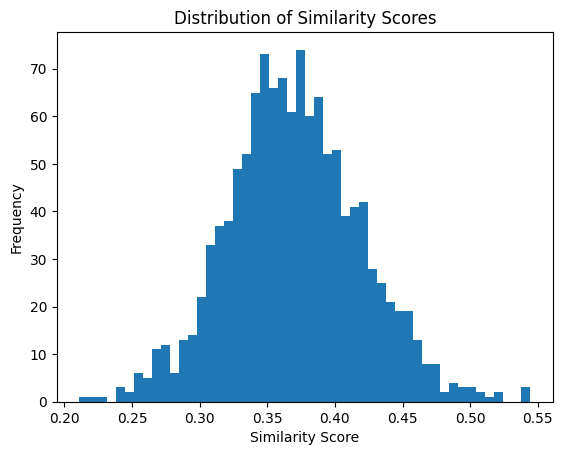

Peak value: 0.371184


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Plot histogram of similarity scores
plt.hist(results_df['Similarity'], bins=50)
plt.title('Distribution of Similarity Scores')
plt.xlabel('Similarity Score')
plt.ylabel('Frequency')
plt.show()

# Find peak value
hist, bins = np.histogram(results_df['Similarity'], bins=50)
peak_value = bins[np.argmax(hist)]

print("Peak value:", peak_value)


Accuracy: 0.7526530612244898
Precision: 0.5416666666666666
Recall: 0.5498489425981873
F1-score: 0.545727136431784


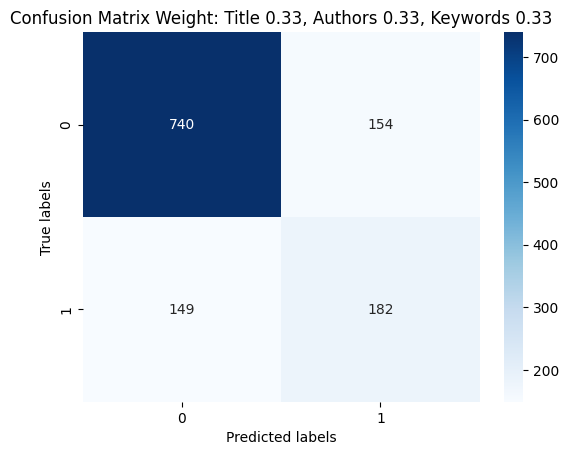

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the labeled CSV file
labeled_df = pd.read_csv('05211940000046_6026221024_Fairness in AI Paper Labeled.csv')

results_df['Label'] = results_df['Label'].astype(int)
labeled_df['Label'] = labeled_df['Label'].astype(int)

# Compare the Label column in labeled_df with the Label column in results_df
y_true = labeled_df['Label']
y_pred = results_df['Label']

# Calculate the accuracy, precision, recall, and f1-score
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Print the results
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Create heatmap of confusion matrix
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix Weight: Title 0.33, Authors 0.33, Keywords 0.33')

plt.show()

## Weight: Title 0.5, Authors 0.1, Keywords 0.4

In [ ]:
import time
import pandas as pd
from fuzzywuzzy import fuzz

# Load the CSV file
df = pd.read_csv('05211940000046_6026221024_Fairness in AI Paper.csv')

# Preprocessing
df['Title'] = df['Title'].str.lower().str.split()
df['Authors'] = df['Authors'].str.lower().str.split(', ')
df['Keywords'] = df['Keywords'].str.lower().str.split(', ')

# Set weights for each column
title_weight = 0.5
author_weight = 0.1
keyword_weight = 0.4

# Create an empty dataframe to store the results
results_df = pd.DataFrame(columns=['Title1', 'Title2', 'Authors1', 'Authors2', 'Keywords1', 'Keywords2', 'Similarity', 'Label'])

starttime2 = time.time()

# Loop through each row in the dataframe and compare the titles, authors, and keywords
for i in range(len(df)):
    for j in range(i+1, len(df)):
        # Compare the titles
        title_score = fuzz.token_sort_ratio(df['Title'][i], df['Title'][j]) / 100.0
        
        # Compare the authors
        author_score = fuzz.token_sort_ratio(' '.join(df['Authors'][i]), ' '.join(df['Authors'][j])) / 100.0
        
        # Compare the keywords
        keyword_score = 0
        for keyword1 in df['Keywords'][i]:
            for keyword2 in df['Keywords'][j]:
                keyword_score += fuzz.ratio(keyword1.strip(), keyword2.strip())
        keyword_score = keyword_score / (len(df['Keywords'][i]) * len(df['Keywords'][j]) * 100.0)
        
        # Calculate the overall score
        score = title_score * title_weight + author_score * author_weight + keyword_score * keyword_weight

        # Assign label based on score
        label = 0 if score < 0.39896 else 1

        # Append the result to the results dataframe
        results_df = results_df.append({'Title1': df['Title'][i],
                                        'Title2': df['Title'][j],
                                        'Authors1': ', '.join(df['Authors'][i]),
                                        'Authors2': ', '.join(df['Authors'][j]),
                                        'Keywords1': ', '.join(df['Keywords'][i]),
                                        'Keywords2': ', '.join(df['Keywords'][j]),
                                        'Similarity': score,
                                        'Label': label}, ignore_index=True)
        endtime2 = time.time()

    results_df = results_df.sort_values(by=['Authors1', 'Authors2'])

    results_df 

<ipython-input-47-0515232cc339>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Title1': df['Title'][i],
<ipython-input-47-0515232cc339>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Title1': df['Title'][i],
<ipython-input-47-0515232cc339>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Title1': df['Title'][i],
<ipython-input-47-0515232cc339>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Title1': df['Title'][i],
<ipython-input-47-0515232cc339>:46: FutureWarning: The frame.append method is deprec

In [ ]:
print("Running time: {} s".format(endtime2 - starttime2))

Running time: 2.7819454669952393 s


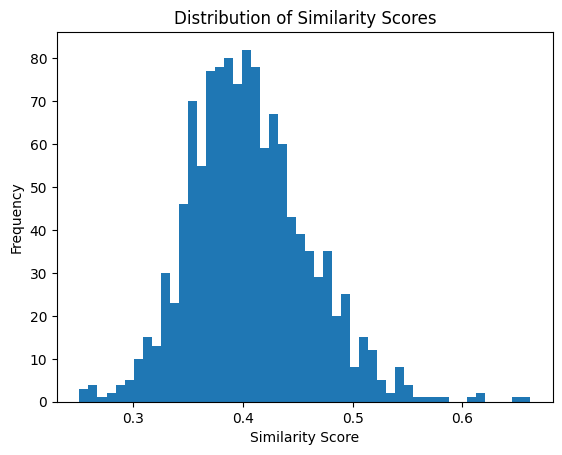

Peak value: 0.39896


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Plot histogram of similarity scores
plt.hist(results_df['Similarity'], bins=50)
plt.title('Distribution of Similarity Scores')
plt.xlabel('Similarity Score')
plt.ylabel('Frequency')
plt.show()

# Find peak value
hist, bins = np.histogram(results_df['Similarity'], bins=50)
peak_value = bins[np.argmax(hist)]

print("Peak value:", peak_value)


Accuracy: 0.7126530612244898
Precision: 0.48346456692913387
Recall: 0.9274924471299094
F1-score: 0.6356107660455487


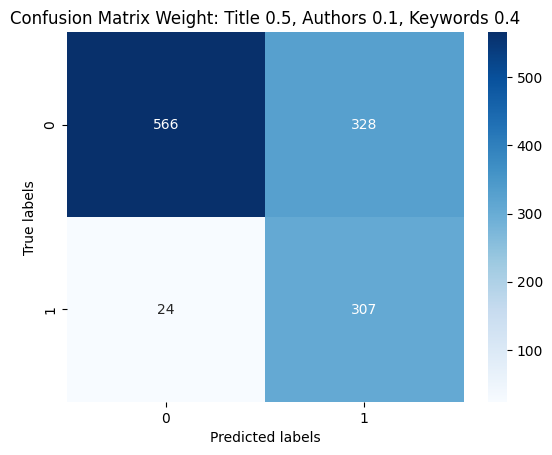

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the labeled CSV file
labeled_df = pd.read_csv('05211940000046_6026221024_Fairness in AI Paper Labeled.csv')

results_df['Label'] = results_df['Label'].astype(int)
labeled_df['Label'] = labeled_df['Label'].astype(int)

# Compare the Label column in labeled_df with the Label column in results_df
y_true = labeled_df['Label']
y_pred = results_df['Label']

# Calculate the accuracy, precision, recall, and f1-score
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Print the results
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Create heatmap of confusion matrix
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix Weight: Title 0.5, Authors 0.1, Keywords 0.4')

plt.show()

## Weight: Title 0.4, Authors 0.5, Keywords 0.1

In [ ]:
import time
import pandas as pd
from fuzzywuzzy import fuzz

# Load the CSV file
df = pd.read_csv('05211940000046_6026221024_Fairness in AI Paper.csv')

# Preprocessing
df['Title'] = df['Title'].str.lower().str.split()
df['Authors'] = df['Authors'].str.lower().str.split(', ')
df['Keywords'] = df['Keywords'].str.lower().str.split(', ')

# Set weights for each column
title_weight = 0.4
author_weight = 0.5
keyword_weight = 0.1

# Create an empty dataframe to store the results
results_df = pd.DataFrame(columns=['Title1', 'Title2', 'Authors1', 'Authors2', 'Keywords1', 'Keywords2', 'Similarity', 'Label'])

starttime3 = time.time()

# Loop through each row in the dataframe and compare the titles, authors, and keywords
for i in range(len(df)):
    for j in range(i+1, len(df)):
        # Compare the titles
        title_score = fuzz.token_sort_ratio(df['Title'][i], df['Title'][j]) / 100.0
        
        # Compare the authors
        author_score = fuzz.token_sort_ratio(' '.join(df['Authors'][i]), ' '.join(df['Authors'][j])) / 100.0
        
        # Compare the keywords
        keyword_score = 0
        for keyword1 in df['Keywords'][i]:
            for keyword2 in df['Keywords'][j]:
                keyword_score += fuzz.ratio(keyword1.strip(), keyword2.strip())
        keyword_score = keyword_score / (len(df['Keywords'][i]) * len(df['Keywords'][j]) * 100.0)
        
        # Calculate the overall score
        score = title_score * title_weight + author_score * author_weight + keyword_score * keyword_weight

        # Assign label based on score
        label = 0 if score < 0.39896 else 1

        # Append the result to the results dataframe
        results_df = results_df.append({'Title1': df['Title'][i],
                                        'Title2': df['Title'][j],
                                        'Authors1': ', '.join(df['Authors'][i]),
                                        'Authors2': ', '.join(df['Authors'][j]),
                                        'Keywords1': ', '.join(df['Keywords'][i]),
                                        'Keywords2': ', '.join(df['Keywords'][j]),
                                        'Similarity': score,
                                        'Label': label}, ignore_index=True)
        endtime3 = time.time()
results_df = results_df.sort_values(by=['Authors1', 'Authors2'])

results_df

<ipython-input-51-3d9e3b160c6f>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Title1': df['Title'][i],
<ipython-input-51-3d9e3b160c6f>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Title1': df['Title'][i],
<ipython-input-51-3d9e3b160c6f>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Title1': df['Title'][i],
<ipython-input-51-3d9e3b160c6f>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Title1': df['Title'][i],
<ipython-input-51-3d9e3b160c6f>:46: FutureWarning: The frame.append method is deprec

,Title1,Title2,Authors1,Authors2,Keywords1,Keywords2,Similarity,Label
1034,"[transparency, and, explainability, of, ai, sy...","[artificial, intelligence,, intersectionality,...","balasubramaniam n,kauppinen m,hiekkanen k,kuja...","bauer gr,lizotte dj","ai systems,ethical guidelines,explainability,q...","ajph,apha,american,association,health,journal,...",0.351,0
1015,"[transparency, and, explainability, of, ai, sy...","[fairness, &, friends, in, the, data, science,...","balasubramaniam n,kauppinen m,hiekkanen k,kuja...","catania b,guerrini g,accinelli c","ai systems,ethical guidelines,explainability,q...","data-informed automated decision system,divers...",0.370,0
1030,"[transparency, and, explainability, of, ai, sy...","[a, sociotechnical, view, of, algorithmic, fai...","balasubramaniam n,kauppinen m,hiekkanen k,kuja...","dolata m,feuerriegel s,schwabe g","ai systems,ethical guidelines,explainability,q...","algorithmic fairness,literature review,problem...",0.365,0
1032,"[transparency, and, explainability, of, ai, sy...","[ai-enabled, radio, resource, allocation, in, ...","balasubramaniam n,kauppinen m,hiekkanen k,kuja...","elsayed m,erol-kantarci m","ai systems,ethical guidelines,explainability,q...","5g mobile communication,delays,quality of serv...",0.383,0
1016,"[transparency, and, explainability, of, ai, sy...","[beyond, bias, and, discrimination:, redefinin...","balasubramaniam n,kauppinen m,hiekkanen k,kuja...","giovanola b,tiribelli s","ai systems,ethical guidelines,explainability,q...","bias,discrimination,ethics of algorithms,fairn...",0.347,0
...,...,...,...,...,...,...,...,...
972,"[applying, differential, privacy, mechanism, i...","[ai, ethics, in, industry:, a, research, frame...","zhu t,yu ps","ville v,kai-kristian k,pekka a","artificial intelligence,differential privacy,f...","ai development,ai ethics,accountability,artifi...",0.307,0
982,"[applying, differential, privacy, mechanism, i...","[artificial, intelligence, and, the, public, s...","zhu t,yu ps","wirtz bw,weyerer jc,geyer c","artificial intelligence,differential privacy,f...","ai applications,ai challenges,artificial intel...",0.391,0
979,"[applying, differential, privacy, mechanism, i...","[effective, exposure, amortizing, for, fair, t...","zhu t,yu ps","yang t,xu z,ai q","artificial intelligence,differential privacy,f...",ccs concepts • information systems → recommend...,0.406,1
990,"[applying, differential, privacy, mechanism, i...","[flexible, and, adaptive, fairness-aware, lear...","zhu t,yu ps","zhang w,zhang m,zhang j,liu z,...","artificial intelligence,differential privacy,f...","ai fairness,flexible fairness,online classific...",0.327,0


In [ ]:
print("Running time: {} s".format(endtime3 - starttime3))

Running time: 3.0690090656280518 s


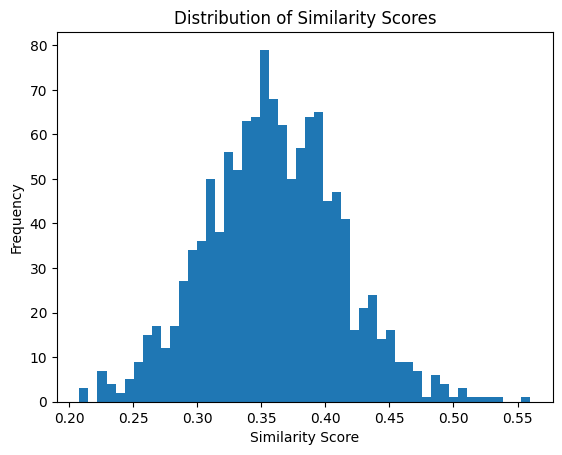

Peak value: 0.34880000000000005


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Plot histogram of similarity scores
plt.hist(results_df['Similarity'], bins=50)
plt.title('Distribution of Similarity Scores')
plt.xlabel('Similarity Score')
plt.ylabel('Frequency')
plt.show()

# Find peak value
hist, bins = np.histogram(results_df['Similarity'], bins=50)
peak_value = bins[np.argmax(hist)]

print("Peak value:", peak_value)


Accuracy: 0.7355102040816327
Precision: 0.5130111524163569
Recall: 0.4169184290030212
F1-score: 0.4600000000000001


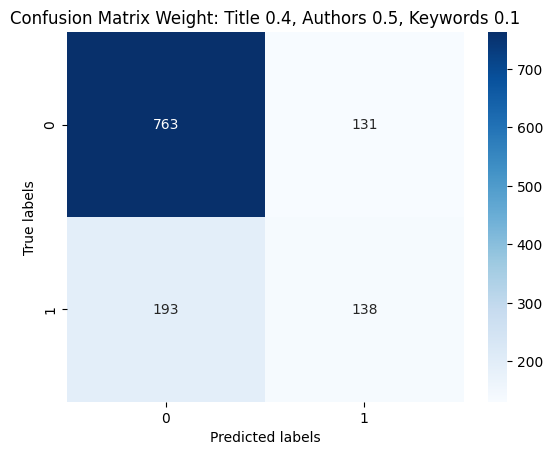

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the labeled CSV file
labeled_df = pd.read_csv('05211940000046_6026221024_Fairness in AI Paper Labeled.csv')

results_df['Label'] = results_df['Label'].astype(int)
labeled_df['Label'] = labeled_df['Label'].astype(int)

# Compare the Label column in labeled_df with the Label column in results_df
y_true = labeled_df['Label']
y_pred = results_df['Label']

# Calculate the accuracy, precision, recall, and f1-score
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Print the results
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Create heatmap of confusion matrix
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix Weight: Title 0.4, Authors 0.5, Keywords 0.1')

plt.show()

## Weight: Title 0.1, Authors 0.4, Keywords 0.5

In [ ]:
import time
import pandas as pd
from fuzzywuzzy import fuzz

# Load the CSV file
df = pd.read_csv('05211940000046_6026221024_Fairness in AI Paper.csv')

# Preprocessing
df['Title'] = df['Title'].str.lower().str.split()
df['Authors'] = df['Authors'].str.lower().str.split(', ')
df['Keywords'] = df['Keywords'].str.lower().str.split(', ')

# Set weights for each column
title_weight = 0.1
author_weight = 0.4
keyword_weight = 0.5

# Create an empty dataframe to store the results
results_df = pd.DataFrame(columns=['Title1', 'Title2', 'Authors1', 'Authors2', 'Keywords1', 'Keywords2', 'Similarity', 'Label'])

starttime4 = time.time()

# Loop through each row in the dataframe and compare the titles, authors, and keywords
for i in range(len(df)):
    for j in range(i+1, len(df)):
        # Compare the titles
        title_score = fuzz.token_sort_ratio(df['Title'][i], df['Title'][j]) / 100.0
        
        # Compare the authors
        author_score = fuzz.token_sort_ratio(' '.join(df['Authors'][i]), ' '.join(df['Authors'][j])) / 100.0
        
        # Compare the keywords
        keyword_score = 0
        for keyword1 in df['Keywords'][i]:
            for keyword2 in df['Keywords'][j]:
                keyword_score += fuzz.ratio(keyword1.strip(), keyword2.strip())
        keyword_score = keyword_score / (len(df['Keywords'][i]) * len(df['Keywords'][j]) * 100.0)
        
        # Calculate the overall score
        score = title_score * title_weight + author_score * author_weight + keyword_score * keyword_weight

        

        # Assign label based on score
        label = 0 if score < 0.39896 else 1

        # Append the result to the results dataframe
        results_df = results_df.append({'Title1': df['Title'][i],
                                        'Title2': df['Title'][j],
                                        'Authors1': ', '.join(df['Authors'][i]),
                                        'Authors2': ', '.join(df['Authors'][j]),
                                        'Keywords1': ', '.join(df['Keywords'][i]),
                                        'Keywords2': ', '.join(df['Keywords'][j]),
                                        'Similarity': score,
                                        'Label': label}, ignore_index=True)
        endtime4 = time.time()

results_df = results_df.sort_values(by=['Authors1', 'Authors2'])

results_df

<ipython-input-55-9658883d1ab2>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Title1': df['Title'][i],
<ipython-input-55-9658883d1ab2>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Title1': df['Title'][i],
<ipython-input-55-9658883d1ab2>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Title1': df['Title'][i],
<ipython-input-55-9658883d1ab2>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Title1': df['Title'][i],
<ipython-input-55-9658883d1ab2>:48: FutureWarning: The frame.append method is deprec

,Title1,Title2,Authors1,Authors2,Keywords1,Keywords2,Similarity,Label
1034,"[transparency, and, explainability, of, ai, sy...","[artificial, intelligence,, intersectionality,...","balasubramaniam n,kauppinen m,hiekkanen k,kuja...","bauer gr,lizotte dj","ai systems,ethical guidelines,explainability,q...","ajph,apha,american,association,health,journal,...",0.335,0
1015,"[transparency, and, explainability, of, ai, sy...","[fairness, &, friends, in, the, data, science,...","balasubramaniam n,kauppinen m,hiekkanen k,kuja...","catania b,guerrini g,accinelli c","ai systems,ethical guidelines,explainability,q...","data-informed automated decision system,divers...",0.361,0
1030,"[transparency, and, explainability, of, ai, sy...","[a, sociotechnical, view, of, algorithmic, fai...","balasubramaniam n,kauppinen m,hiekkanen k,kuja...","dolata m,feuerriegel s,schwabe g","ai systems,ethical guidelines,explainability,q...","algorithmic fairness,literature review,problem...",0.351,0
1032,"[transparency, and, explainability, of, ai, sy...","[ai-enabled, radio, resource, allocation, in, ...","balasubramaniam n,kauppinen m,hiekkanen k,kuja...","elsayed m,erol-kantarci m","ai systems,ethical guidelines,explainability,q...","5g mobile communication,delays,quality of serv...",0.401,1
1016,"[transparency, and, explainability, of, ai, sy...","[beyond, bias, and, discrimination:, redefinin...","balasubramaniam n,kauppinen m,hiekkanen k,kuja...","giovanola b,tiribelli s","ai systems,ethical guidelines,explainability,q...","bias,discrimination,ethics of algorithms,fairn...",0.370,0
...,...,...,...,...,...,...,...,...
972,"[applying, differential, privacy, mechanism, i...","[ai, ethics, in, industry:, a, research, frame...","zhu t,yu ps","ville v,kai-kristian k,pekka a","artificial intelligence,differential privacy,f...","ai development,ai ethics,accountability,artifi...",0.336,0
982,"[applying, differential, privacy, mechanism, i...","[artificial, intelligence, and, the, public, s...","zhu t,yu ps","wirtz bw,weyerer jc,geyer c","artificial intelligence,differential privacy,f...","ai applications,ai challenges,artificial intel...",0.364,0
979,"[applying, differential, privacy, mechanism, i...","[effective, exposure, amortizing, for, fair, t...","zhu t,yu ps","yang t,xu z,ai q","artificial intelligence,differential privacy,f...",ccs concepts • information systems → recommend...,0.403,1
990,"[applying, differential, privacy, mechanism, i...","[flexible, and, adaptive, fairness-aware, lear...","zhu t,yu ps","zhang w,zhang m,zhang j,liu z,...","artificial intelligence,differential privacy,f...","ai fairness,flexible fairness,online classific...",0.331,0


In [ ]:
print("Running time: {} s".format(endtime3 - starttime3))

Running time: 3.0690090656280518 s


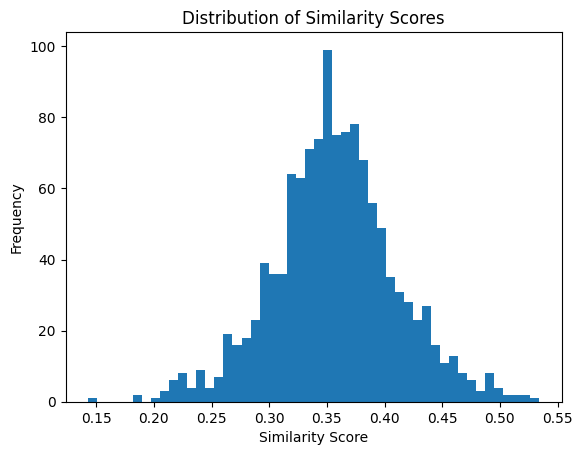

Peak value: 0.34632


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Plot histogram of similarity scores
plt.hist(results_df['Similarity'], bins=50)
plt.title('Distribution of Similarity Scores')
plt.xlabel('Similarity Score')
plt.ylabel('Frequency')
plt.show()

# Find peak value
hist, bins = np.histogram(results_df['Similarity'], bins=50)
peak_value = bins[np.argmax(hist)]

print("Peak value:", peak_value)


Accuracy: 0.7167346938775511
Precision: 0.4661016949152542
Recall: 0.3323262839879154
F1-score: 0.3880070546737213


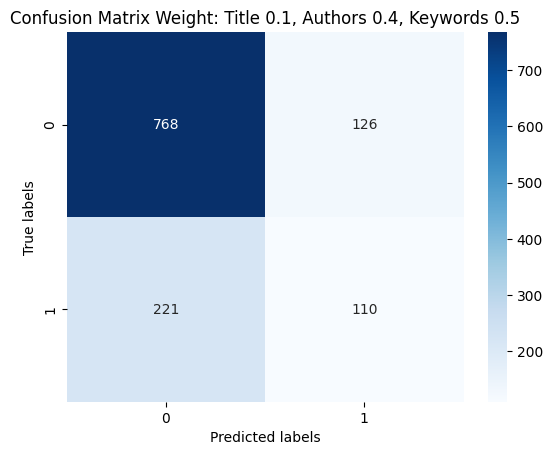

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the labeled CSV file
labeled_df = pd.read_csv('05211940000046_6026221024_Fairness in AI Paper Labeled.csv')

results_df['Label'] = results_df['Label'].astype(int)
labeled_df['Label'] = labeled_df['Label'].astype(int)

# Compare the Label column in labeled_df with the Label column in results_df
y_true = labeled_df['Label']
y_pred = results_df['Label']

# Calculate the accuracy, precision, recall, and f1-score
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Print the results
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Create heatmap of confusion matrix
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix Weight: Title 0.1, Authors 0.4, Keywords 0.5')

plt.show()

# Di bawah ini codingan yg lama

In [ ]:
import pandas as pd
from fuzzywuzzy import fuzz

# Load the CSV file
df = pd.read_csv('05211940000046_6026221024_Fairness in AI Paper.csv')

# Preprocessing
#df['Title'] = df['Title'].str.lower().str.split()
#df['Authors'] = df['Authors'].str.lower().str.split(',')
#df['Keywords'] = df['Keywords'].str.lower().str.split(',')

df['Title'] = df['Title'].str.lower()
df['Authors'] = df['Authors'].str.lower()
df['Keywords'] = df['Keywords'].str.lower()

In [ ]:
# Create an empty dataframe to store the results
results_df = pd.DataFrame(columns=['Title1', 'Title2', 'Authors1', 'Authors2', 'Keywords1', 'Keywords2', 'Similarity'])
print(len(df))

50


In [ ]:
import time

# Set weights for each column
title_weight = 0.5
keyword_weight = 0.5
author_weight = 0

starttime = time.time()

# Loop through each row in the dataframe and compare the titles, authors, and keywords
for i in range(len(df)):
    for j in range(i+1, len(df)):
        # Compare the titles
        title_score = fuzz.token_sort_ratio(df['Title'][i], df['Title'][j]) / 100.0
        
        # Compare the authors
        author_score = fuzz.token_sort_ratio(df['Authors'][i], df['Authors'][j]) / 100.0
 

        # Compare the keywords
        keyword_score = 0
        for keyword1 in df['Keywords'][i]:
            for keyword2 in df['Keywords'][j]:
                keyword_score += fuzz.ratio(keyword1.strip(), keyword2.strip())
        keyword_score = keyword_score / (len(df['Keywords'][i]) * len(df['Keywords'][j]) * 100.0)
        
        # Calculate the overall score
        score = title_score * title_weight + author_score * author_weight + keyword_score * keyword_weight
        
        # Append the result to the results dataframe
        results_df = results_df.append({'Title1': df['Title'][i],
                                        'Title2': df['Title'][j],
                                        'Authors1': df['Authors'][i],
                                        'Authors2': df['Authors'][j],
                                        'Keywords1': df['Keywords'][i],
                                        'Keywords2': df['Keywords'][j],
                                        'Similarity': score}, ignore_index=True)


endtime = time.time()

# results_df.to_csv('output.csv', index=False)

<ipython-input-61-e9c9c8a92f51>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Title1': df['Title'][i],
<ipython-input-61-e9c9c8a92f51>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Title1': df['Title'][i],
<ipython-input-61-e9c9c8a92f51>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Title1': df['Title'][i],
<ipython-input-61-e9c9c8a92f51>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Title1': df['Title'][i],
<ipython-input-61-e9c9c8a92f51>:31: FutureWarning: The frame.append method is deprec

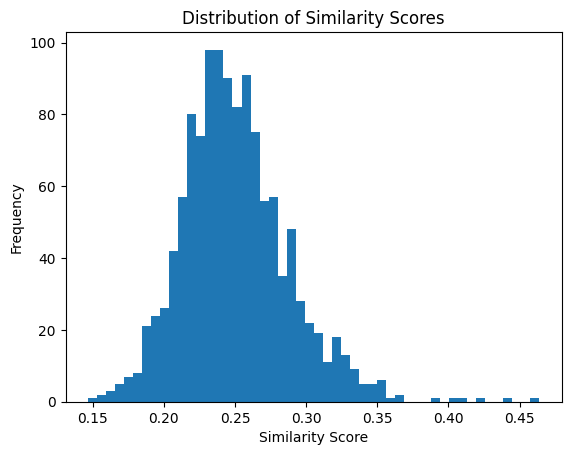

Peak value: 0.2292026239253704


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Plot histogram of similarity scores
plt.hist(results_df['Similarity'], bins=50)
plt.title('Distribution of Similarity Scores')
plt.xlabel('Similarity Score')
plt.ylabel('Frequency')
plt.show()

# Find peak value
hist, bins = np.histogram(results_df['Similarity'], bins=50)
peak_value = bins[np.argmax(hist)]

print("Peak value:", peak_value)


In [ ]:
print("Running time without blocking : {} s".format(endtime1 - starttime1))

Running time without blocking : 3.0056982040405273 s


# With Blocking

## Stop words Removal

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Load the CSV file
df = pd.read_csv('05211940000046_6026221024_Fairness in AI Paper.csv')

# Preprocessing
stop_words = set(stopwords.words('english'))

df['Title'] = df['Title'].str.lower().str.split().apply(lambda x: [word for word in x if word not in stop_words])
df['Authors'] = df['Authors'].str.lower().str.split(',').apply(lambda x: [word for word in x if word not in stop_words])
df['Keywords'] = df['Keywords'].str.lower().str.split(',').apply(lambda x: [word for word in x if word not in stop_words])

# Set weights for each column
title_weight = 0.5
author_weight = 0.1
keyword_weight = 0.4

# Create an empty dataframe to store the results
results_df = pd.DataFrame(columns=['Title1', 'Title2', 'Authors1', 'Authors2', 'Keywords1', 'Keywords2', 'Similarity', 'Label'])

starttime5 = time.time()

# Loop through each row in the dataframe and compare the titles, authors, and keywords
for i in range(len(df)):
    for j in range(i+1, len(df)):
        # Compare the titles
        title_score = fuzz.token_sort_ratio(df['Title'][i], df['Title'][j]) / 100.0
        
        # Compare the authors
        author_score = fuzz.token_sort_ratio(' '.join(df['Authors'][i]), ' '.join(df['Authors'][j])) / 100.0
        
        # Compare the keywords
        keyword_score = 0
        for keyword1 in df['Keywords'][i]:
            for keyword2 in df['Keywords'][j]:
                keyword_score += fuzz.ratio(keyword1.strip(), keyword2.strip())
        keyword_score = keyword_score / (len(df['Keywords'][i]) * len(df['Keywords'][j]) * 100.0)
        
        # Calculate the overall score
        score = title_score * title_weight + author_score * author_weight + keyword_score * keyword_weight
        
        # Assign label based on score
        label = 0 if score < 0.39896 else 1

        # Append the result to the results dataframe
        results_df = results_df.append({'Title1': df['Title'][i],
                                        'Title2': df['Title'][j],
                                        'Authors1': ', '.join(df['Authors'][i]),
                                        'Authors2': ', '.join(df['Authors'][j]),
                                        'Keywords1': ', '.join(df['Keywords'][i]),
                                        'Keywords2': ', '.join(df['Keywords'][j]),
                                        'Similarity': score,
                                        'Label': label}, ignore_index=True)
endtime5 = time.time()

results_df = results_df.sort_values(by=['Authors1', 'Authors2'])
results_df


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-64-420b6be4ab7c>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Title1': df['Title'][i],
<ipython-input-64-420b6be4ab7c>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Title1': df['Title'][i],
<ipython-input-64-420b6be4ab7c>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Title1': df['Title'][i],
<ipython-input-64-420b6be4ab7c>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df

,Title1,Title2,Authors1,Authors2,Keywords1,Keywords2,Similarity,Label
1034,"[transparency, explainability, ai, systems:, e...","[artificial, intelligence,, intersectionality,...","balasubramaniam n, kauppinen m, hiekkanen k, k...","bauer gr, lizotte dj","ai systems, ethical guidelines, explainability...","ajph, apha, american, association, health, jou...",0.339491,0
1015,"[transparency, explainability, ai, systems:, e...","[fairness, &, friends, data, science, era]","balasubramaniam n, kauppinen m, hiekkanen k, k...","catania b, guerrini g, accinelli c","ai systems, ethical guidelines, explainability...","data-informed automated decision system, diver...",0.367280,0
1030,"[transparency, explainability, ai, systems:, e...","[sociotechnical, view, algorithmic, fairness]","balasubramaniam n, kauppinen m, hiekkanen k, k...","dolata m, feuerriegel s, schwabe g","ai systems, ethical guidelines, explainability...","algorithmic fairness, literature review, probl...",0.350133,0
1032,"[transparency, explainability, ai, systems:, e...","[ai-enabled, radio, resource, allocation, 5g, ...","balasubramaniam n, kauppinen m, hiekkanen k, k...","elsayed m, erol-kantarci m","ai systems, ethical guidelines, explainability...","5g mobile communication, delays, quality of se...",0.366800,0
1016,"[transparency, explainability, ai, systems:, e...","[beyond, bias, discrimination:, redefining, ai...","balasubramaniam n, kauppinen m, hiekkanen k, k...","giovanola b, tiribelli s","ai systems, ethical guidelines, explainability...","bias, discrimination, ethics of algorithms, fa...",0.348133,0
...,...,...,...,...,...,...,...,...
972,"[applying, differential, privacy, mechanism, a...","[ai, ethics, industry:, research, framework]","zhu t, yu ps","ville v, kai-kristian k, pekka a","artificial intelligence, differential privacy,...","ai development, ai ethics, accountability, art...",0.345543,0
982,"[applying, differential, privacy, mechanism, a...","[artificial, intelligence, public, sector—appl...","zhu t, yu ps","wirtz bw, weyerer jc, geyer c","artificial intelligence, differential privacy,...","ai applications, ai challenges, artificial int...",0.471200,1
979,"[applying, differential, privacy, mechanism, a...","[effective, exposure, amortizing, fair, top-k,...","zhu t, yu ps","yang t, xu z, ai q","artificial intelligence, differential privacy,...",ccs concepts • information systems → recommend...,0.330600,0
990,"[applying, differential, privacy, mechanism, a...","[flexible, adaptive, fairness-aware, learning,...","zhu t, yu ps","zhang w, zhang m, zhang j, liu z, ...","artificial intelligence, differential privacy,...","ai fairness, flexible fairness, online classif...",0.356267,0


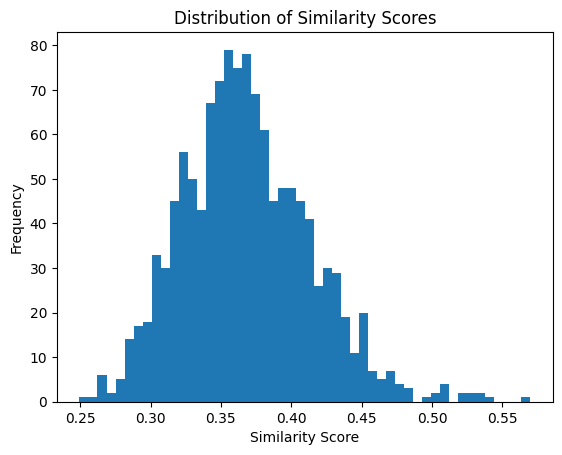

Peak value: 0.351996


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Plot histogram of similarity scores
plt.hist(results_df['Similarity'], bins=50)
plt.title('Distribution of Similarity Scores')
plt.xlabel('Similarity Score')
plt.ylabel('Frequency')
plt.show()

# Find peak value
hist, bins = np.histogram(results_df['Similarity'], bins=50)
peak_value = bins[np.argmax(hist)]

print("Peak value:", peak_value)


Accuracy: 0.7665306122448979
Precision: 0.5757575757575758
Recall: 0.5166163141993958
F1-score: 0.5445859872611466


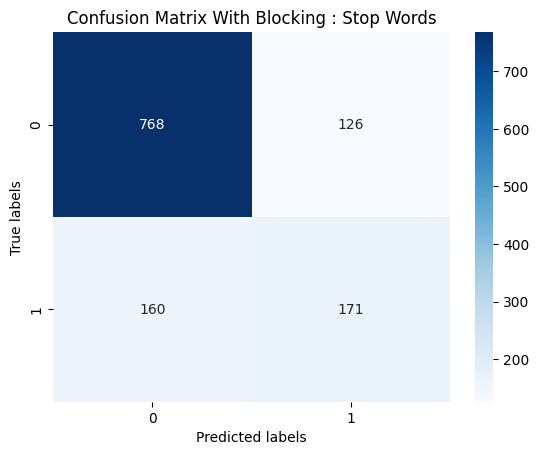

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the labeled CSV file
labeled_df = pd.read_csv('05211940000046_6026221024_Fairness in AI Paper Labeled.csv')

results_df['Label'] = results_df['Label'].astype(int)
labeled_df['Label'] = labeled_df['Label'].astype(int)

# Compare the Label column in labeled_df with the Label column in results_df
y_true = labeled_df['Label']
y_pred = results_df['Label']

# Calculate the accuracy, precision, recall, and f1-score
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Print the results
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Create heatmap of confusion matrix
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix With Blocking : Stop Words')

plt.show()

## Size

In [ ]:
import time
import pandas as pd
from fuzzywuzzy import fuzz

# Load the CSV file
df = pd.read_csv('05211940000046_6026221024_Fairness in AI Paper.csv')

# Preprocessing
df['Title'] = df['Title'].str.lower().str.split()
df['Authors'] = df['Authors'].str.lower().str.split(', ')
df['Keywords'] = df['Keywords'].str.lower().str.split(', ')

# Set weights for each column
title_weight = 0.5
author_weight = 0.1
keyword_weight = 0.4

# Create an empty dataframe to store the results
results_df = pd.DataFrame(columns=['Title1', 'Title2', 'Authors1', 'Authors2', 'Keywords1', 'Keywords2', 'Similarity', 'Label'])

starttime6 = time.time()

# Loop through each row in the dataframe and compare the titles, authors, and keywords
size_block = 100

for i in range(len(df)):
    for j in range(i+1, min(i+size_block, len(df))):
        # Compare the titles
        title_score = fuzz.token_sort_ratio(df['Title'][i], df['Title'][j]) / 100.0
        
        # Compare the authors
        author_score = fuzz.token_sort_ratio(' '.join(df['Authors'][i]), ' '.join(df['Authors'][j])) / 100.0
        
        # Compare the keywords
        keyword_score = 0
        for keyword1 in df['Keywords'][i]:
            for keyword2 in df['Keywords'][j]:
                keyword_score += fuzz.ratio(keyword1.strip(), keyword2.strip())
        keyword_score = keyword_score / (len(df['Keywords'][i]) * len(df['Keywords'][j]) * 100.0)
        
        # Calculate the overall score
        score = title_score * title_weight + author_score * author_weight + keyword_score * keyword_weight
    
        # Assign label based on score
        label = 0 if score < 0.39896 else 1

        # Append the result to the results dataframe
        results_df = results_df.append({'Title1': df['Title'][i],
                                        'Title2': df['Title'][j],
                                        'Authors1': ', '.join(df['Authors'][i]),
                                        'Authors2': ', '.join(df['Authors'][j]),
                                        'Keywords1': ', '.join(df['Keywords'][i]),
                                        'Keywords2': ', '.join(df['Keywords'][j]),
                                        'Similarity': score,
                                        'Label': label}, ignore_index=True)
        endtime6 = time.time()

results_df = results_df.sort_values(by=['Authors1', 'Authors2'])

results_df


<ipython-input-67-1d9a03072d0b>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Title1': df['Title'][i],
<ipython-input-67-1d9a03072d0b>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Title1': df['Title'][i],
<ipython-input-67-1d9a03072d0b>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Title1': df['Title'][i],
<ipython-input-67-1d9a03072d0b>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Title1': df['Title'][i],
<ipython-input-67-1d9a03072d0b>:48: FutureWarning: The frame.append method is deprec

,Title1,Title2,Authors1,Authors2,Keywords1,Keywords2,Similarity,Label
1034,"[transparency, and, explainability, of, ai, sy...","[artificial, intelligence,, intersectionality,...","balasubramaniam n,kauppinen m,hiekkanen k,kuja...","bauer gr,lizotte dj","ai systems,ethical guidelines,explainability,q...","ajph,apha,american,association,health,journal,...",0.404,1
1015,"[transparency, and, explainability, of, ai, sy...","[fairness, &, friends, in, the, data, science,...","balasubramaniam n,kauppinen m,hiekkanen k,kuja...","catania b,guerrini g,accinelli c","ai systems,ethical guidelines,explainability,q...","data-informed automated decision system,divers...",0.399,1
1030,"[transparency, and, explainability, of, ai, sy...","[a, sociotechnical, view, of, algorithmic, fai...","balasubramaniam n,kauppinen m,hiekkanen k,kuja...","dolata m,feuerriegel s,schwabe g","ai systems,ethical guidelines,explainability,q...","algorithmic fairness,literature review,problem...",0.374,0
1032,"[transparency, and, explainability, of, ai, sy...","[ai-enabled, radio, resource, allocation, in, ...","balasubramaniam n,kauppinen m,hiekkanen k,kuja...","elsayed m,erol-kantarci m","ai systems,ethical guidelines,explainability,q...","5g mobile communication,delays,quality of serv...",0.416,1
1016,"[transparency, and, explainability, of, ai, sy...","[beyond, bias, and, discrimination:, redefinin...","balasubramaniam n,kauppinen m,hiekkanen k,kuja...","giovanola b,tiribelli s","ai systems,ethical guidelines,explainability,q...","bias,discrimination,ethics of algorithms,fairn...",0.413,1
...,...,...,...,...,...,...,...,...
972,"[applying, differential, privacy, mechanism, i...","[ai, ethics, in, industry:, a, research, frame...","zhu t,yu ps","ville v,kai-kristian k,pekka a","artificial intelligence,differential privacy,f...","ai development,ai ethics,accountability,artifi...",0.397,0
982,"[applying, differential, privacy, mechanism, i...","[artificial, intelligence, and, the, public, s...","zhu t,yu ps","wirtz bw,weyerer jc,geyer c","artificial intelligence,differential privacy,f...","ai applications,ai challenges,artificial intel...",0.465,1
979,"[applying, differential, privacy, mechanism, i...","[effective, exposure, amortizing, for, fair, t...","zhu t,yu ps","yang t,xu z,ai q","artificial intelligence,differential privacy,f...",ccs concepts • information systems → recommend...,0.381,0
990,"[applying, differential, privacy, mechanism, i...","[flexible, and, adaptive, fairness-aware, lear...","zhu t,yu ps","zhang w,zhang m,zhang j,liu z,...","artificial intelligence,differential privacy,f...","ai fairness,flexible fairness,online classific...",0.382,0


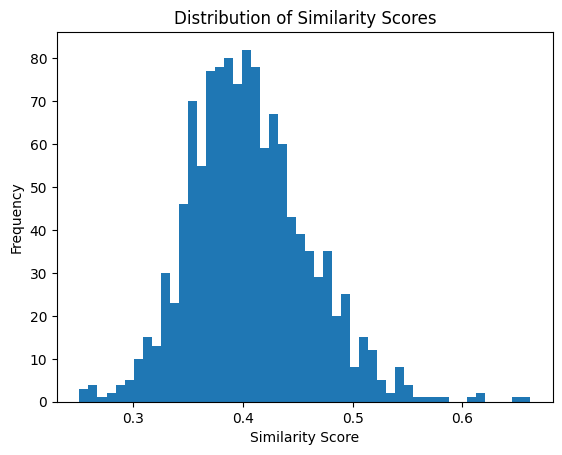

Peak value: 0.39896


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Plot histogram of similarity scores
plt.hist(results_df['Similarity'], bins=50)
plt.title('Distribution of Similarity Scores')
plt.xlabel('Similarity Score')
plt.ylabel('Frequency')
plt.show()

# Find peak value
hist, bins = np.histogram(results_df['Similarity'], bins=50)
peak_value = bins[np.argmax(hist)]

print("Peak value:", peak_value)


Accuracy: 0.7126530612244898
Precision: 0.48346456692913387
Recall: 0.9274924471299094
F1-score: 0.6356107660455487


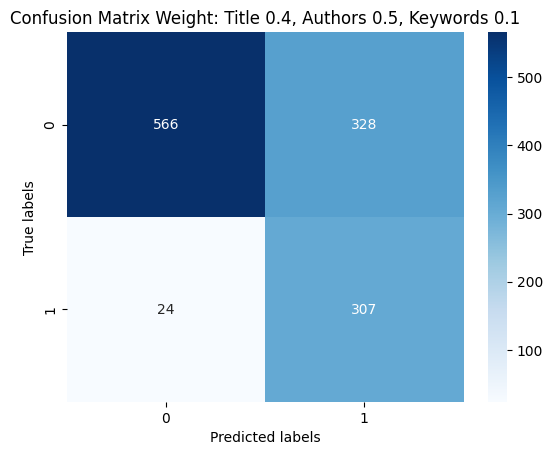

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the labeled CSV file
labeled_df = pd.read_csv('05211940000046_6026221024_Fairness in AI Paper Labeled.csv')

results_df['Label'] = results_df['Label'].astype(int)
labeled_df['Label'] = labeled_df['Label'].astype(int)

# Compare the Label column in labeled_df with the Label column in results_df
y_true = labeled_df['Label']
y_pred = results_df['Label']

# Calculate the accuracy, precision, recall, and f1-score
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Print the results
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Create heatmap of confusion matrix
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix Weight: Title 0.4, Authors 0.5, Keywords 0.1')

plt.show()

# Running Time

In [ ]:
#print("Running time without blocking (Weight: Title 0.33, Authors 0.33, Keywords 0.33) : {} s".format(endtime1 - starttime1))
print("Running time without blocking (Weight: Title 0.5, Authors 0.1, Keywords 0.4) : {} s".format(endtime2 - starttime2))
#print("Running time without blocking (Weight: Title 0.4, Authors 0.5, Keywords 0.1) : {} s".format(endtime3 - starttime3))
#print("Running time without blocking (Weight: Title 0.1, Authors 0.4, Keywords 0.5) : {} s".format(endtime4 - starttime4))
print("Running time with blocking (Stop Words Removal) : {} s".format(endtime5 - starttime5))
print("Running time with blocking (Size Filtering) : {} s".format(endtime6 - starttime6))

Running time without blocking (Weight: Title 0.5, Authors 0.1, Keywords 0.4) : 2.7819454669952393 s
Running time with blocking (Stop Words Removal) : 2.7984540462493896 s
Running time with blocking (Size Filtering) : 2.567147970199585 s
